#**Load Data**

In [1]:
import pandas as pd

data = pd.read_csv('/content/data_clean.csv')
data.head()

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency,Price
0,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
1,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
2,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000
3,45.4,Mineral Crystal,dây nhựa,Touch Solar,20,Nhật Bản,Casio,4752000
4,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000


#**Convert categorical features to numeric type**

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Glass_material'] = le.fit_transform(data['Glass_material'])
data['Wire_material'] = le.fit_transform(data['Wire_material'])
data['Apparatus'] = le.fit_transform(data['Apparatus'])
data['Origin'] = le.fit_transform(data['Origin'])
data['agency'] = le.fit_transform(data['agency'])

data.head()


,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency,Price
0,45.4,8,12,7,20,11,4,5695000
1,45.4,8,12,7,20,11,4,5695000
2,45.4,8,8,7,20,11,4,5515000
3,45.4,8,15,9,20,11,4,4752000
4,45.4,8,8,7,20,11,4,5515000


In [3]:

print(data.dtypes)

Face_Diameter     float64
Glass_material      int64
Wire_material       int64
Apparatus           int64
Waterproof          int64
Origin              int64
agency              int64
Price               int64
dtype: object


#**Split Train-Test dataset**

In [4]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=15)

#**Normalize the data**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['Face_Diameter', 'Glass_material', 'Wire_material', 'Apparatus','Waterproof' ,'Origin' ,'agency']

data_train[vars_normalizing] = scaler.fit_transform(data_train[vars_normalizing])
data_test[vars_normalizing] = scaler.transform(data_test[vars_normalizing])



##**X_Train , Y_Train**

In [6]:
x_train = data_train.drop('Price', axis=1)
y_train = data_train['Price']

In [7]:
x_train

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency
489,-0.765112,0.722829,1.420744,0.646413,-0.444261,-0.436547,0.875667
1547,1.440685,-0.261749,-0.753728,-1.543627,0.509901,0.286717,0.717320
2262,-0.458752,0.722829,-0.995336,-1.543627,-0.825926,-1.159811,-0.285542
2508,-0.152391,-0.261749,-0.512120,0.646413,-0.444261,-1.521444,-1.499534
255,0.000789,-0.261749,-0.270512,-1.543627,-0.825926,0.286717,-0.074413
...,...,...,...,...,...,...,...
1739,-1.071473,0.722829,1.420744,0.646413,-0.444261,0.467534,0.506191
2715,-0.458752,0.722829,-0.512120,-1.543627,-0.444261,-1.159811,-0.496671
2204,-0.918293,0.722829,-0.995336,-1.543627,-0.444261,-1.521444,-0.074413
2432,-0.458752,0.722829,-0.995336,-1.543627,0.509901,-1.159811,-1.182840


##**X_Test , Y_Test**

In [8]:
x_test = data_test.drop(['Price'], axis=1)
y_test = data_test['Price']

In [9]:
x_test

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency
1554,3.217577,0.722829,-0.753728,0.646413,0.509901,0.286717,0.928449
2246,-0.765112,0.722829,-0.995336,-1.543627,-0.825926,-1.159811,-0.285542
50,1.195596,-0.261749,-0.632924,0.646413,2.418226,0.286717,-1.499534
2912,-0.458752,0.722829,-0.512120,-1.543627,-0.825926,-1.159811,0.347845
2656,1.134324,-4.200058,-0.512120,0.646413,0.509901,-1.521444,0.189498
...,...,...,...,...,...,...,...
1281,0.644147,-3.707769,-0.512120,0.646413,-0.444261,0.286717,0.664538
2272,-0.765112,-0.261749,-0.512120,0.646413,-0.444261,-1.521444,-1.393969
2816,2.145315,-0.261749,-1.236944,0.646413,2.418226,-1.521444,-1.499534
669,-0.765112,0.722829,1.420744,0.646413,-0.444261,-0.436547,0.875667


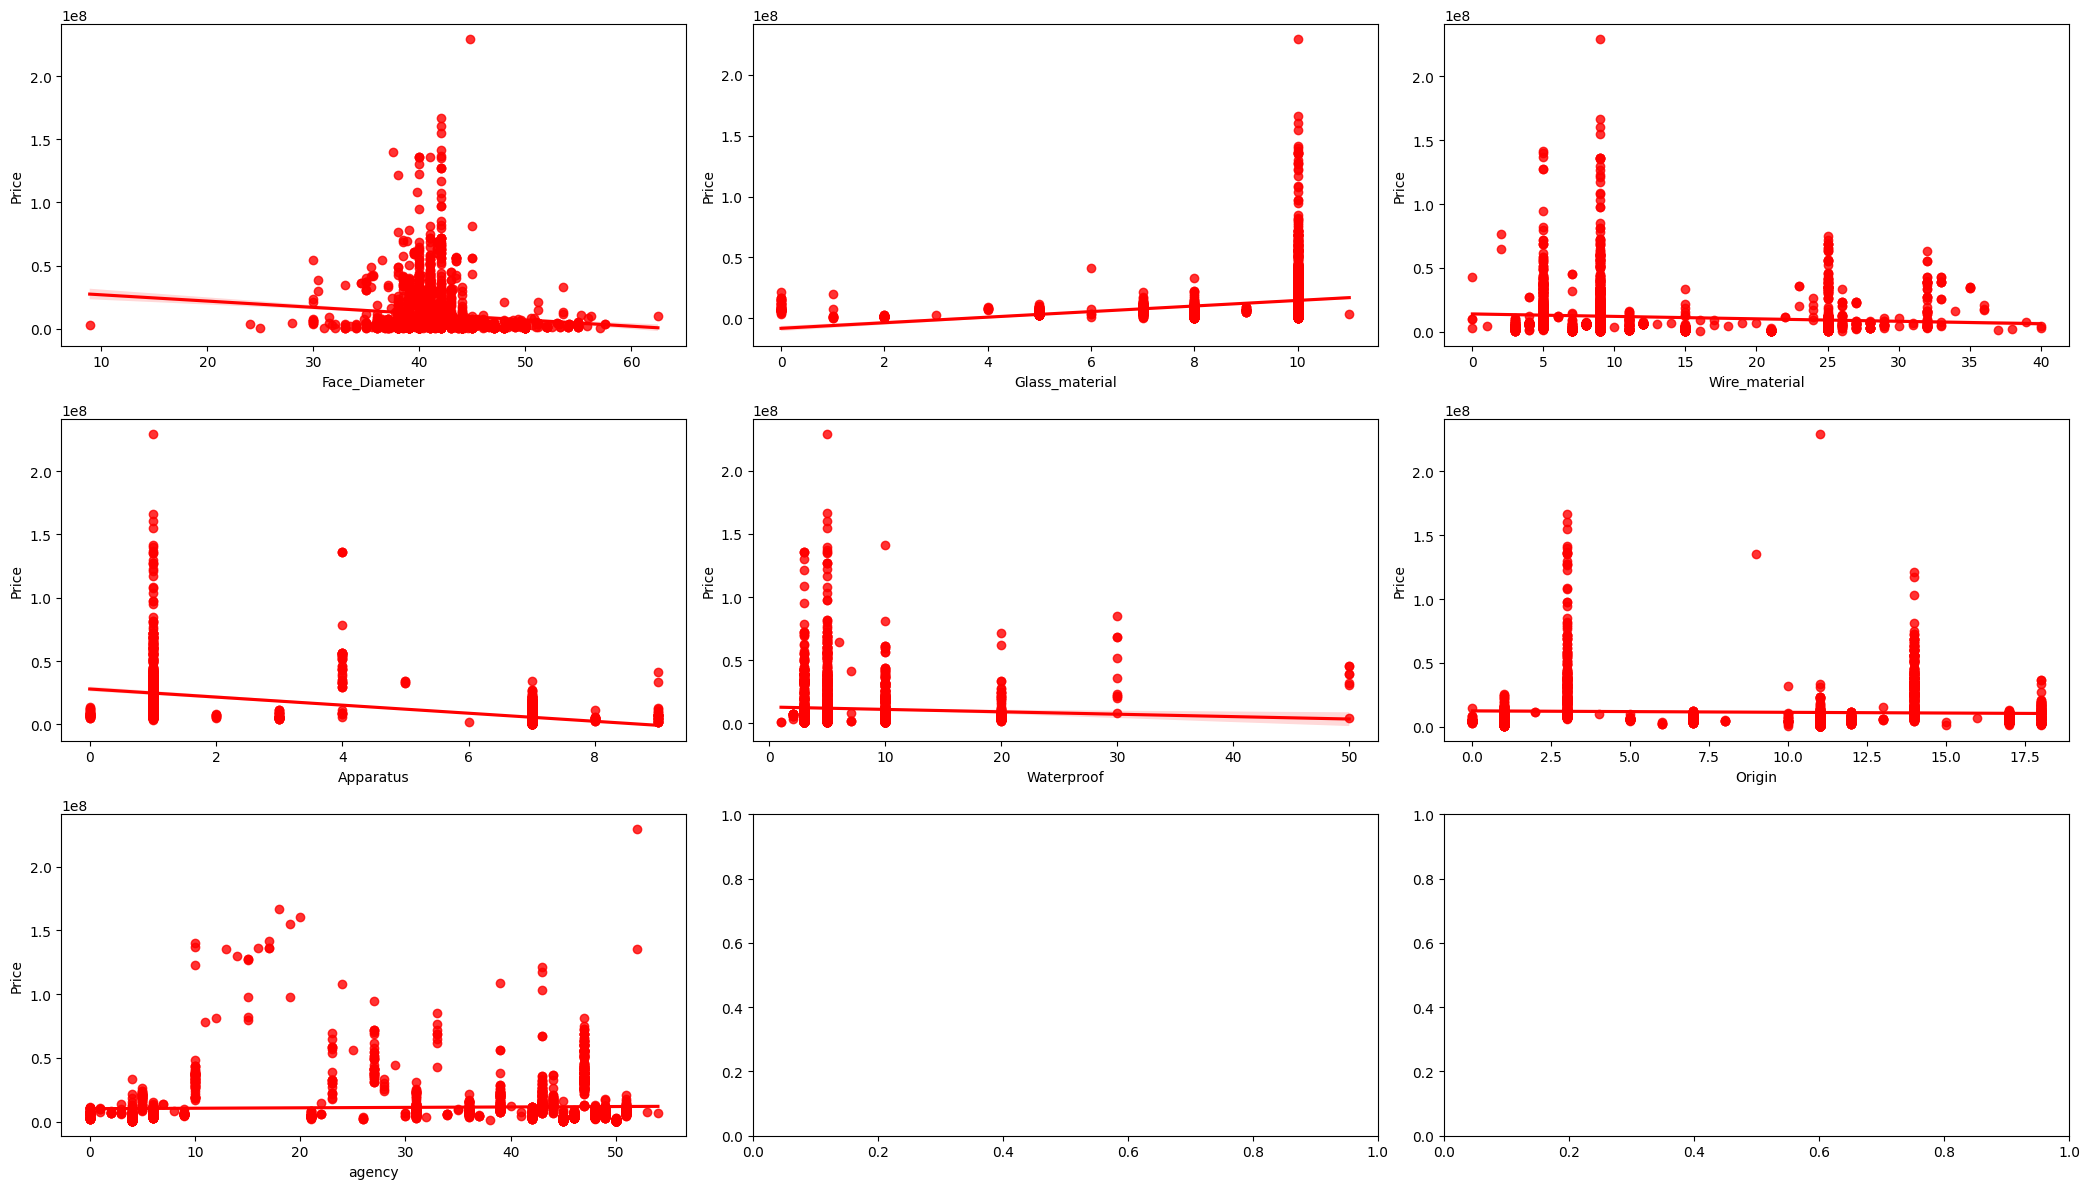

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(21,12))

ax1 = plt.subplot(331)
ax1 = sns.regplot(data=data, y='Price', x='Face_Diameter', color='red')
ax2 = plt.subplot(332)
ax2 = sns.regplot(data=data, y='Price', x='Glass_material', color='red')
ax3 = plt.subplot(333)
ax3 = sns.regplot(data=data, y='Price', x='Wire_material', color='red')
ax4 = plt.subplot(334)
ax4 = sns.regplot(data=data, y='Price', x='Apparatus', color='red')
ax5 = plt.subplot(335)
ax5 = sns.regplot(data=data, y='Price', x='Waterproof', color='red')
ax6 = plt.subplot(336)
ax6 = sns.regplot(data=data, y='Price', x='Origin', color='red')
ax7 = plt.subplot(337)
ax7 = sns.regplot(data=data, y='Price', x='agency', color='red')


plt.tight_layout()

##**Creating and Modeling using XGBoost Regression**

###Hyperparameter tuning

In [11]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

###Define the grid of hyperparameters to search

In [12]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

###Initialize Model and set up the RandomizedSearch

In [13]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV

# regressor = xgb.XGBRegressor()
# random_cv = RandomizedSearchCV(estimator=regressor,
#             param_distributions=parameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 3,
#             verbose = 5,
#             return_train_score = True,
#             random_state=42)

###Train to find best estrimator

In [14]:
# random_cv.fit(x_train, y_train)

In [15]:
# random_cv.best_estimator_

In [16]:
# random_cv.best_params_

###Initialize Model again with best params

In [17]:
import xgboost as xgb
regressor = xgb.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)
regressor.fit(x_train,y_train)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

###Predict on test data

In [18]:
y_pred_advanced = regressor.predict(x_test)

###Result

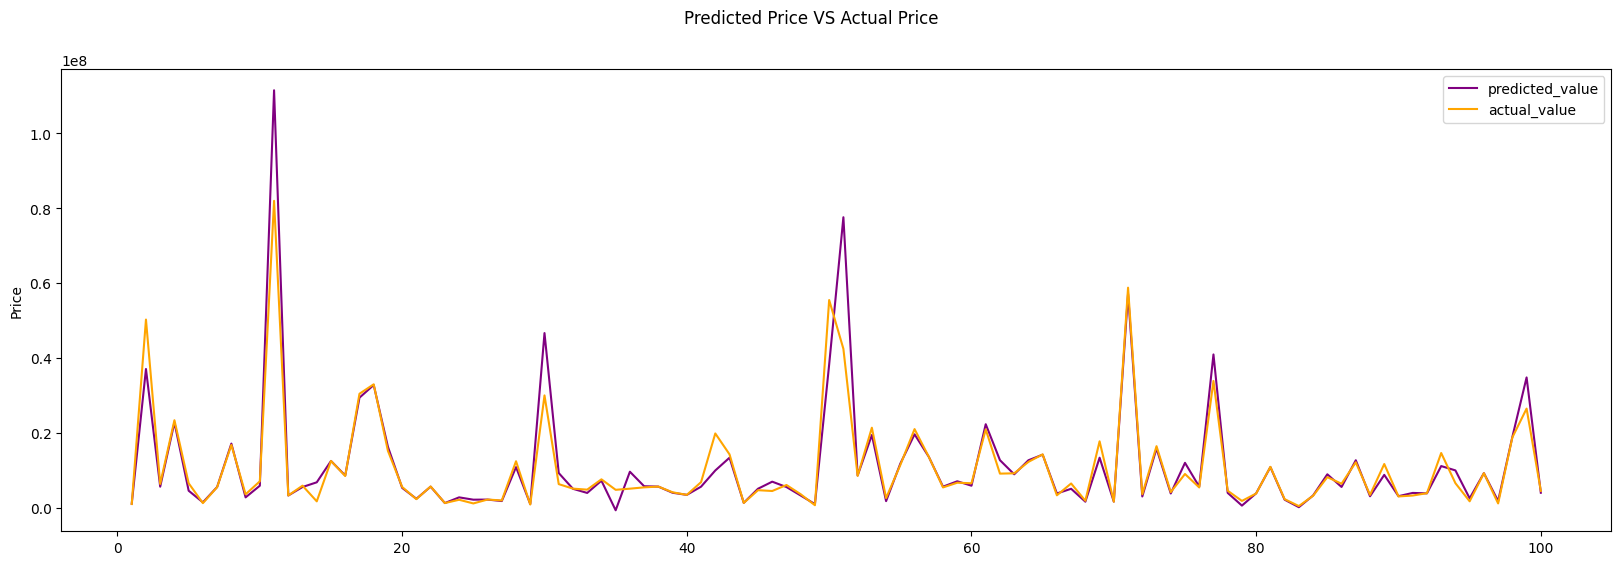

In [19]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:100], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:100], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()
plot_residuals(y_test, y_pred_advanced)

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  return (R2, rmse, mae)
R2_xgboost, rmse_xgboost, mae_xgboost = accuracy_score(y_test, y_pred_advanced, regressor)
print('R2:', R2_xgboost)
print('RMSE:', rmse_xgboost)
print('MAE:', mae_xgboost)

R2: 0.8107055463740694
RMSE: 7410859.211242802
MAE: 2407699.960835376


#**Decision Tree Regressor**

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# Tạo mô hình Cây quyết định
decision_tree_model = DecisionTreeRegressor(random_state=42)

###**Train model**

In [22]:
decision_tree_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

###**Predict on test data**

In [23]:
y_pred_tree = decision_tree_model.predict(x_test)

###**Result**

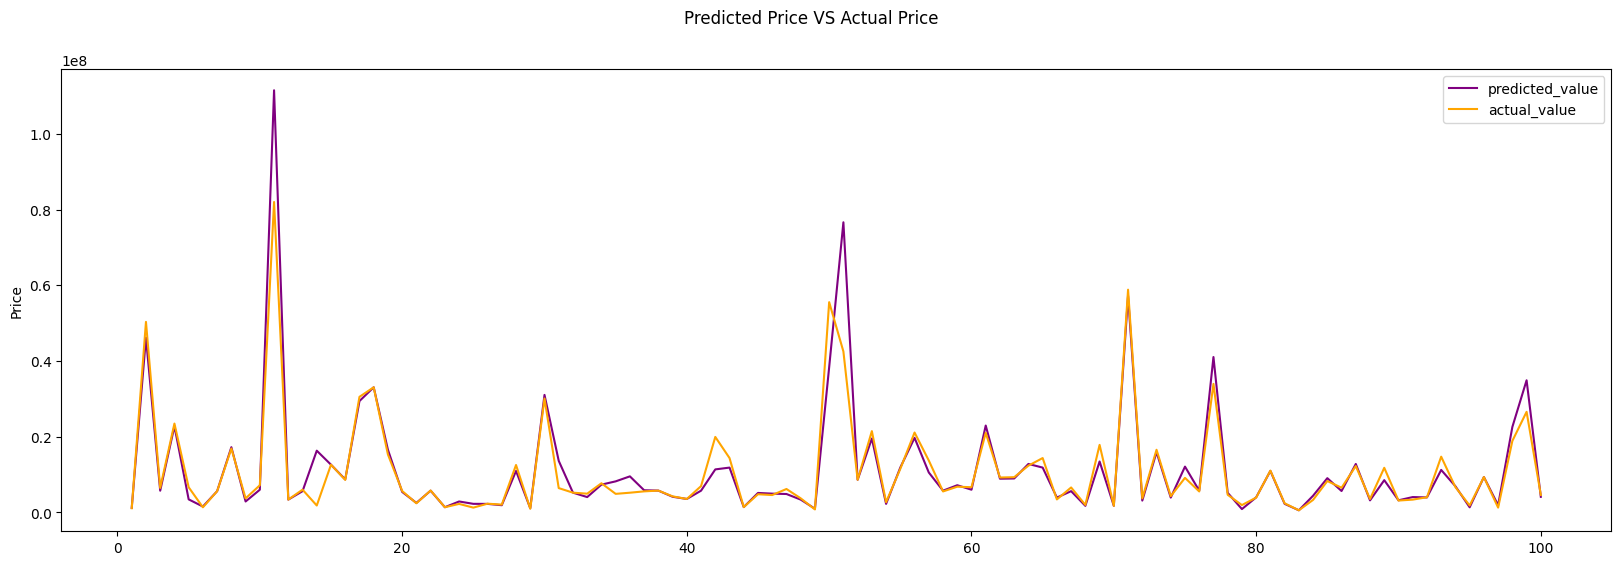

In [24]:
plot_residuals(y_test, y_pred_tree)


In [25]:
R2_tree, rmse_tree, mae_tree = accuracy_score(y_test, y_pred_tree, decision_tree_model)
print("R2 Score:", R2_tree)
print("RMSE:", rmse_tree)
print("MAE:", mae_tree)

R2 Score: 0.8061740724674115
RMSE: 7499037.988191519
MAE: 2281920.789216741


#**Random Forest Regressor**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Tạo mô hình Random Forest với 10 cây quyết định
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

##**Train model**

In [27]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

###**Predict on test data**

In [28]:
y_pred_advanced_randomforest = rf_model.predict(x_test)

##**Result**

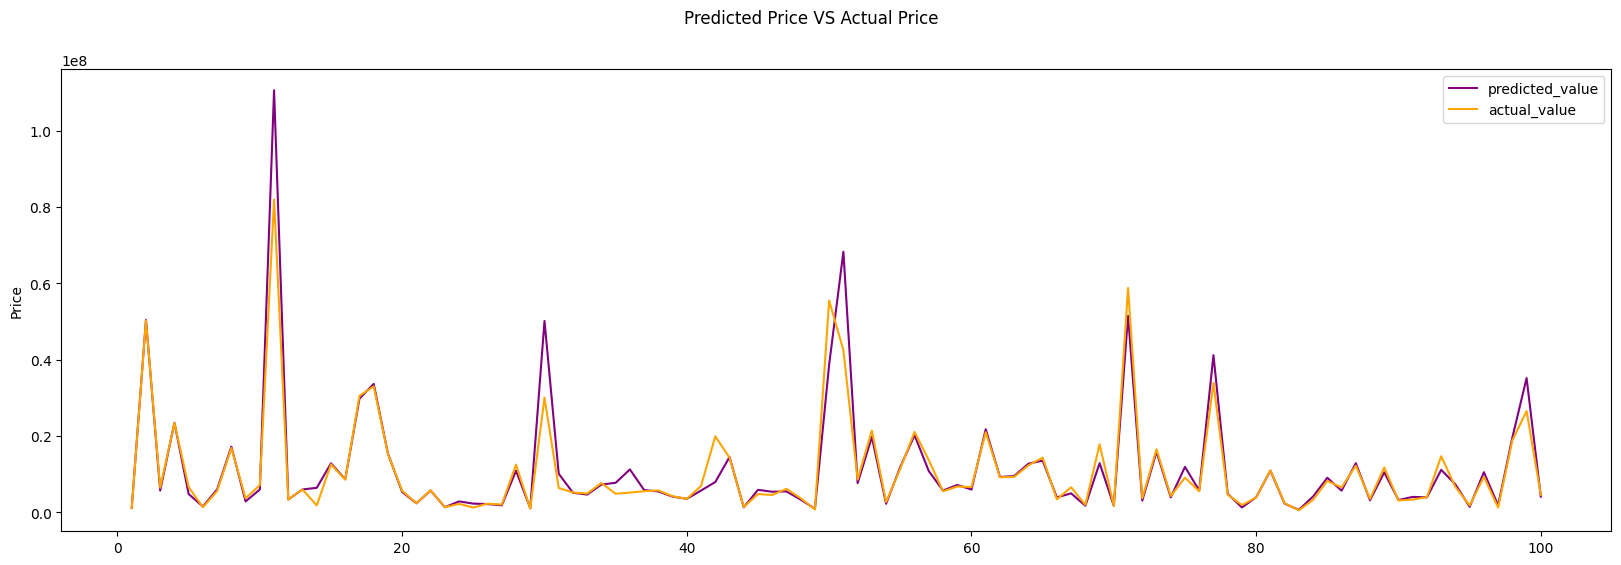

In [29]:
plot_residuals(y_test, y_pred_advanced_randomforest)

In [30]:
R2_rf, rmse_rf, mae_rf = accuracy_score(y_test, y_pred_advanced_randomforest, rf_model)
print("R2 Score:", R2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

R2 Score: 0.8449834353867611
RMSE: 6706387.940698827
MAE: 2210779.5925364043


#**Compare Model**

In [31]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Decision Tree Regressor', R2_tree, rmse_tree, mae_tree]
results.loc[1] = ['XGBoost Regression', R2_xgboost, rmse_xgboost, mae_xgboost]
results.loc[2] = ['Random Forest Regressor', R2_rf, rmse_rf, mae_rf]
results.head()

,Algorithm,R2,RMSE,MAE
0,Decision Tree Regressor,0.806174,7.499038e+06,2.281921e+06
1,XGBoost Regression,0.810706,7.410859e+06,2.407700e+06
2,Random Forest Regressor,0.844983,6.706388e+06,2.210780e+06
